In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network  import MLPClassifier

# graph
import graphviz
from sklearn import tree

# sclaer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer




In [37]:
class AnalyzeIris:   
    def __init__(self):
        iris = load_iris()
        self.X = iris.data
        self.y = iris.target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state=0)
        self.feature_names = iris.feature_names
        self.methods = {
            'LogisticRegression': LogisticRegression(max_iter=10000),
            'LinearSVC': LinearSVC(max_iter=10000,dual=True),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=4),
            'LinearRegression': LinearRegression(),
            'RandomForestClassifier': RandomForestClassifier(),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'MLPClassifier': MLPClassifier(max_iter=10000)
        }
    
    def Get(self):
        df = pd.DataFrame(data = self.X, columns=self.feature_names)
        df['Label'] = self.y
        return df
    
    def PairPlot(self, cmap='brg'):
        data = self.Get()
        target = data['Label']
        data = data.drop('Label', axis=1)
        pd.plotting.scatter_matrix( data ,c=target,figsize=(15, 15), hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=cmap)
        plt.show()
        
    def AllSupervised(self, n_neighbors):
        methods = self.methods
        
        test_score_list = []
        
        for name, model in methods.items():
            print(f"=== {name} ===")
            test_score = cross_val_score(model, self.X_test, self.y_test, cv=5)
            train_score = cross_val_score(model, self.X_train, self.y_train, cv=5)
            test_score_list.append(test_score)
            
            for i in range(5):
                print(f"test_score : {test_score[i]:.3f}   train_score : {train_score[i]:.3f}")

        return 
        
    def GetSupervised(self):
        methods = self.methods
        test_score_list = []
        
        for name, model in methods.items():
            test_score = cross_val_score(model, self.X_test, self.y_test, cv=5)
            test_score_list.append(test_score)
        
        model_names = list(methods.keys())
        dict1 = dict(zip(model_names, test_score_list))
        df = pd.DataFrame(data=dict1)
        return df
    
    def BestSupervised(self):
        data = self.GetSupervised().describe()
        best_method = data.loc["mean"].idxmax()
        best_score = data.loc["mean"].max()
        return best_method, best_score
    
    def PlotFeatureImportancesAll(self):
        methods = {
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
            'GradientBoostingClassifier': GradientBoostingClassifier()
        }
        for name, model in methods.items():
            model.fit(self.X_train, self.y_train)
            labels = self.feature_names
            importances = model.feature_importances_
            plt.figure(figsize=(10, 6))
            plt.barh(y=range(len(importances )), width=importances )
            plt.yticks(ticks=range(len(labels)), labels=labels)
            plt.xlabel(f'Feature Importance : {name}')
            plt.show()    
            
    def VisualizeDecisionTree(self):
        clf = DecisionTreeClassifier().fit(self.X_train, self.y_train)
        graph = graphviz.Source(tree.export_graphviz(clf, class_names=self.feature_names, filled=True))
        return graph

## 練習問題1

In [38]:
iris = AnalyzeIris()
iris.Get()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


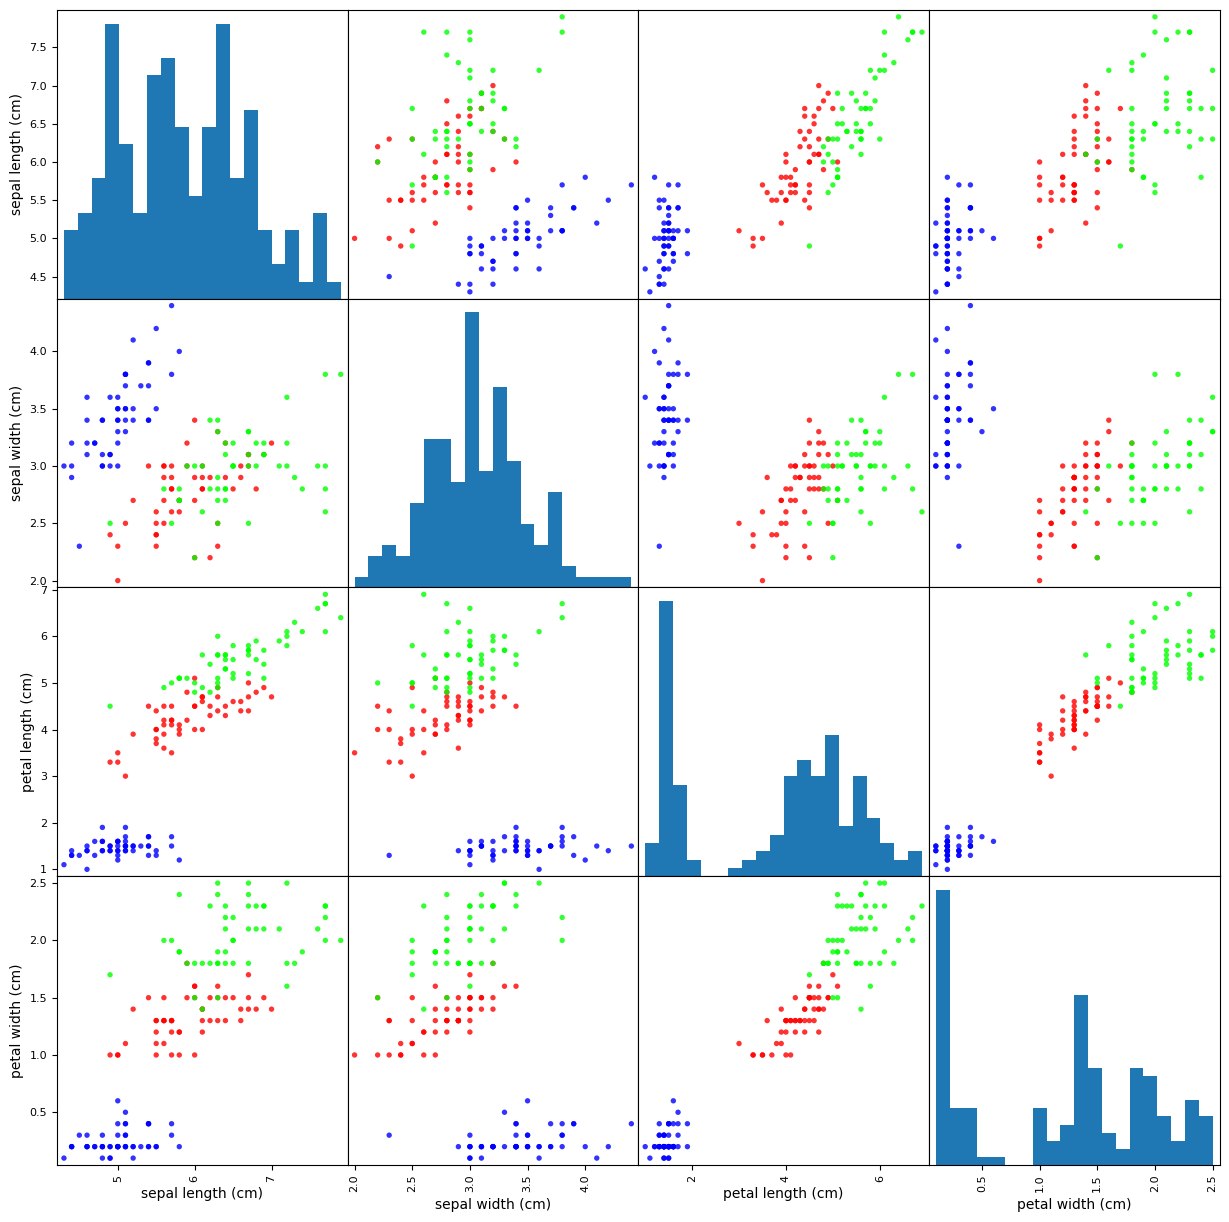

In [39]:
iris.PairPlot()

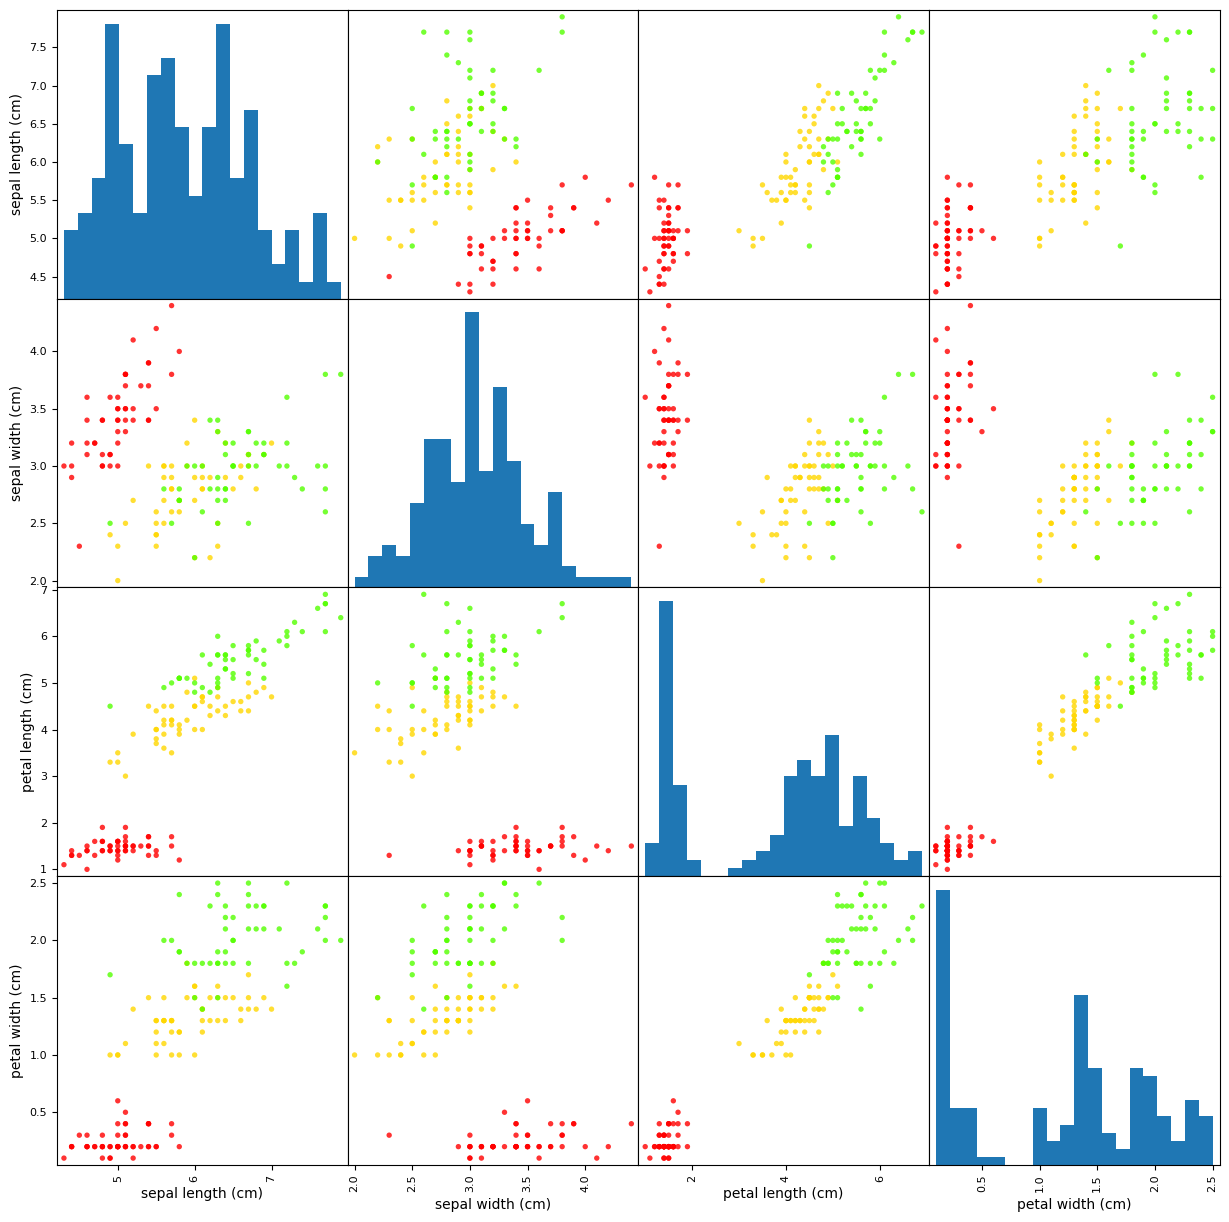

In [40]:
iris.PairPlot('prism')

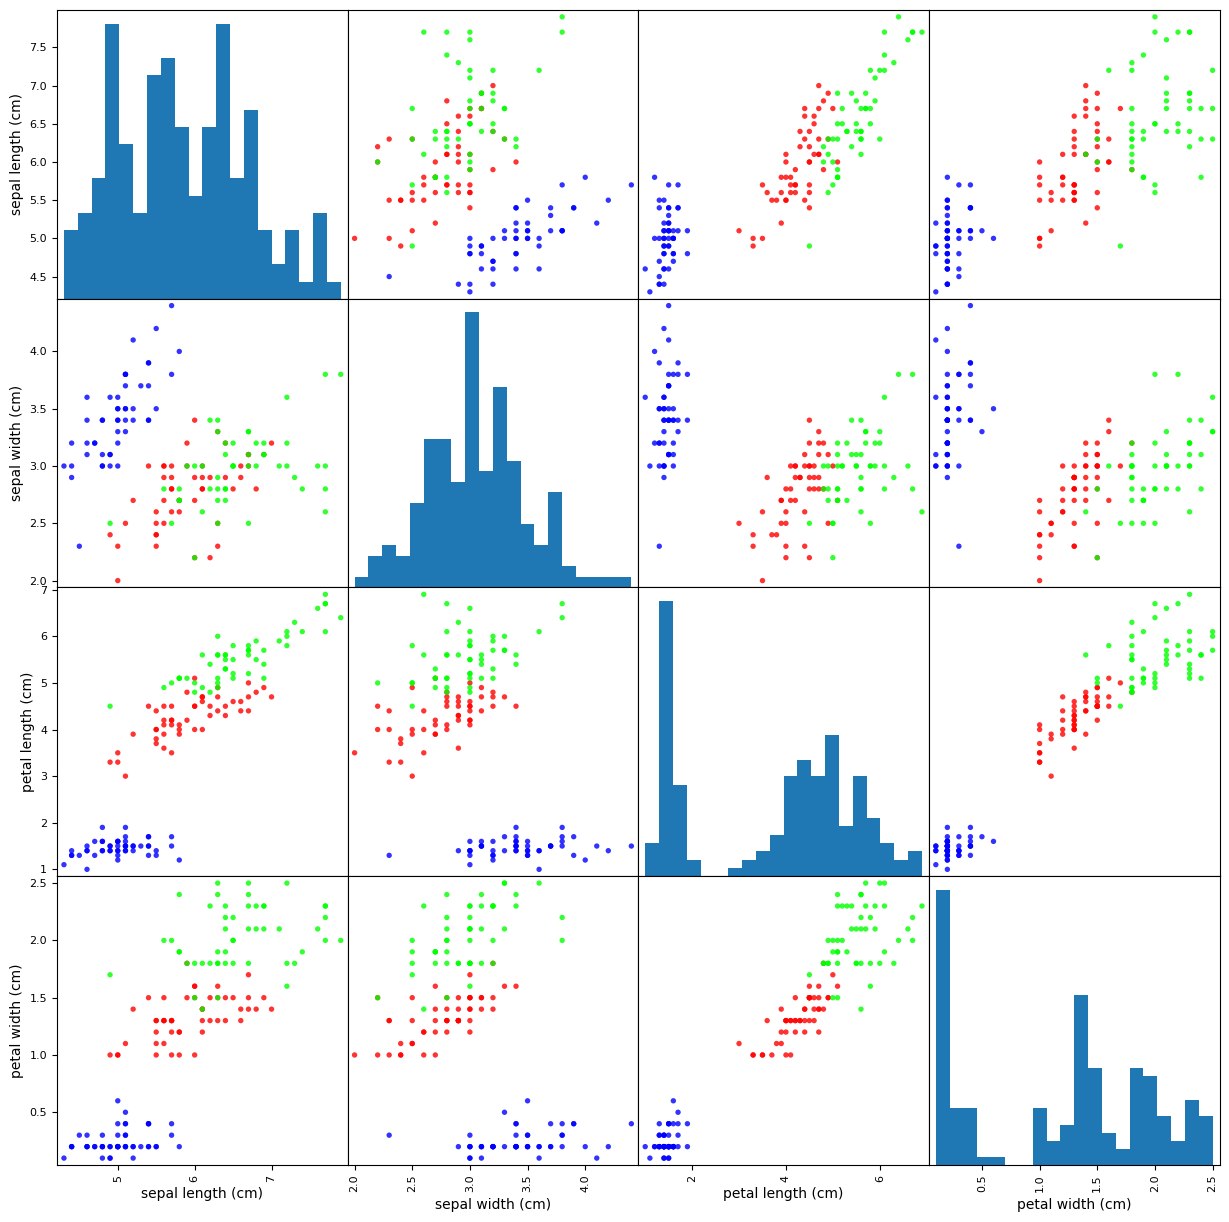

In [41]:
iris.PairPlot('brg')

## 練習問題2

In [42]:
iris.AllSupervised(n_neighbors=4)

=== LogisticRegression ===
test_score : 1.000   train_score : 1.000
test_score : 0.875   train_score : 0.957
test_score : 0.750   train_score : 1.000
test_score : 0.857   train_score : 0.909
test_score : 0.857   train_score : 0.955
=== LinearSVC ===
test_score : 0.875   train_score : 1.000
test_score : 0.875   train_score : 0.957
test_score : 0.875   train_score : 1.000
test_score : 0.857   train_score : 0.955
test_score : 0.714   train_score : 0.955
=== DecisionTreeClassifier ===
test_score : 0.875   train_score : 0.957
test_score : 0.875   train_score : 0.957
test_score : 0.875   train_score : 1.000
test_score : 1.000   train_score : 0.909
test_score : 0.857   train_score : 0.955
=== KNeighborsClassifier ===
test_score : 1.000   train_score : 0.957
test_score : 1.000   train_score : 0.913
test_score : 0.750   train_score : 1.000
test_score : 0.857   train_score : 0.864
test_score : 0.857   train_score : 1.000
=== LinearRegression ===
test_score : 0.943   train_score : 0.824
test_scor

In [43]:
iris.GetSupervised()

,LogisticRegression,LinearSVC,DecisionTreeClassifier,KNeighborsClassifier,LinearRegression,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier
0,1.000000,0.875000,0.750000,1.000000,0.942646,1.000000,1.000000,1.000000
1,0.875000,0.875000,0.875000,1.000000,0.466063,0.875000,0.875000,0.875000
2,0.750000,0.875000,0.875000,0.750000,0.911264,1.000000,0.875000,0.875000
3,0.857143,0.857143,1.000000,0.857143,0.880983,1.000000,1.000000,0.857143
4,0.857143,0.714286,0.857143,0.857143,0.811185,0.857143,0.857143,0.857143


In [44]:
df_score = iris.GetSupervised().describe()
df_score

,LogisticRegression,LinearSVC,DecisionTreeClassifier,KNeighborsClassifier,LinearRegression,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.867857,0.839286,0.871429,0.892857,0.802428,0.921429,0.921429,0.917857
std,0.088928,0.070304,0.088748,0.107143,0.194226,0.072095,0.072095,0.075339
min,0.750000,0.714286,0.750000,0.750000,0.466063,0.857143,0.857143,0.857143
25%,0.857143,0.857143,0.857143,0.857143,0.811185,0.875000,0.875000,0.857143
50%,0.857143,0.875000,0.875000,0.857143,0.880983,0.875000,0.875000,0.875000
75%,0.875000,0.875000,0.875000,1.000000,0.911264,1.000000,1.000000,1.000000
max,1.000000,0.875000,1.000000,1.000000,0.942646,1.000000,1.000000,1.000000


In [45]:
best_method, best_score = iris.BestSupervised()
print("BestMethod is ", best_method, " : ", "{0:0.4f}".format(best_score))

BestMethod is  RandomForestClassifier  :  0.9464


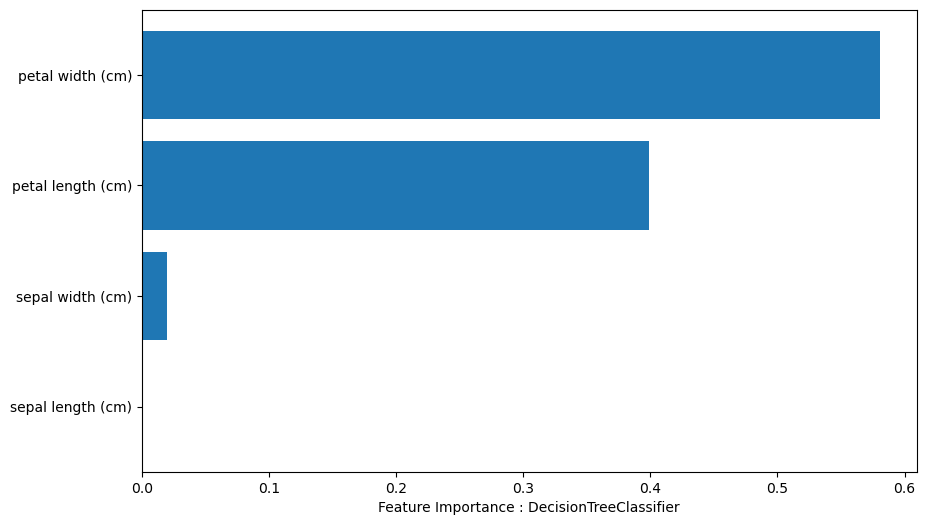

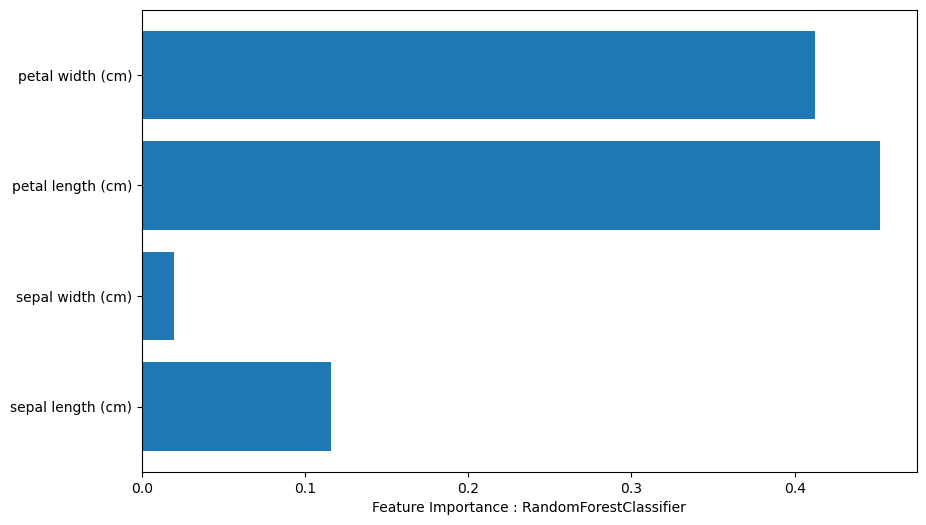

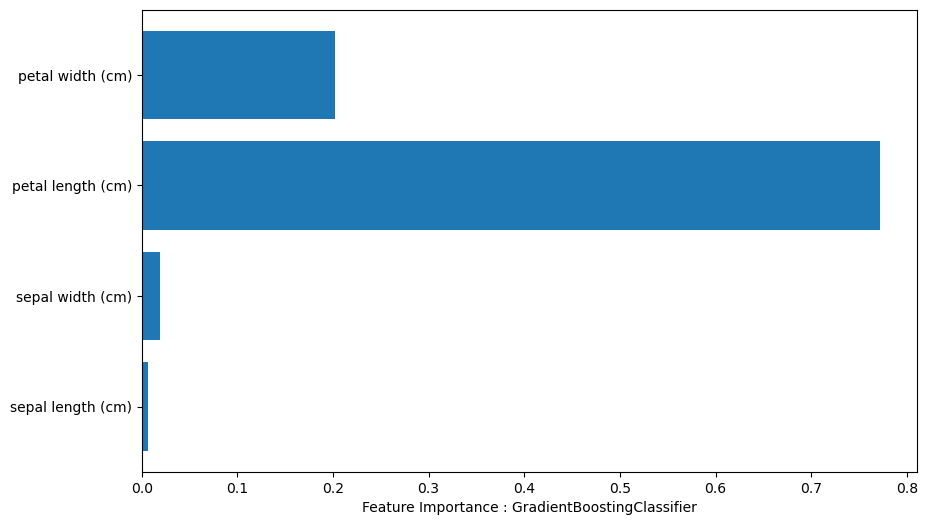

In [46]:
iris.PlotFeatureImportancesAll()

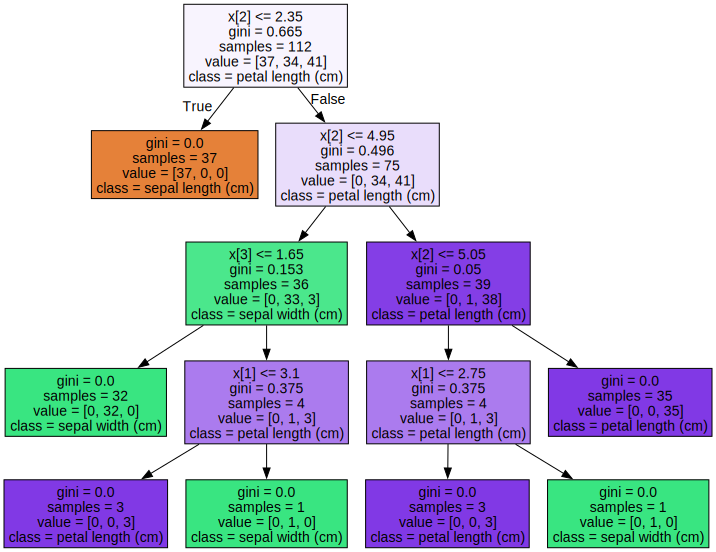

In [47]:
graph = iris.VisualizeDecisionTree()
graph

## 練習問題３
